In [12]:
import pandas as pd
import matplotlib.pyplot as plt
file_path_1 = 'C:/Users/лепеха/OneDrive/Рабочий стол/Учеба/ETHUSD.csv'
file_path_2 = 'C:/Users/лепеха/OneDrive/Рабочий стол/Учеба/IceaCreamFrozenDessert.csv'
ETH_df = pd.read_csv(file_path_1)
IceCream_df = pd.read_csv(file_path_2)
import matplotlib.pyplot as plt
import numpy as np


In [13]:
ETH_df = ETH_df.dropna()

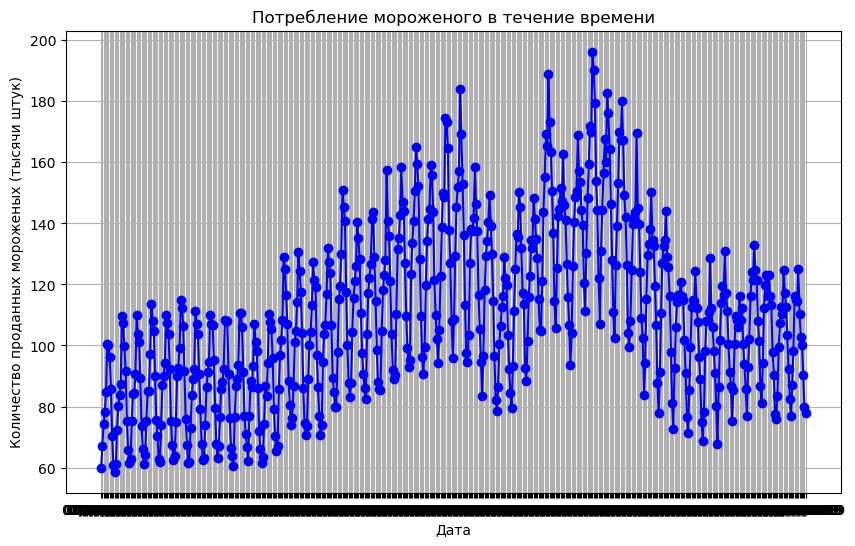

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(IceCream_df['DATE'], IceCream_df['value'], marker='o', linestyle='-', color='b')
plt.title('Потребление мороженого в течение времени')
plt.xlabel('Дата')
plt.ylabel('Количество проданных мороженых (тысячи штук)')
plt.grid(True)

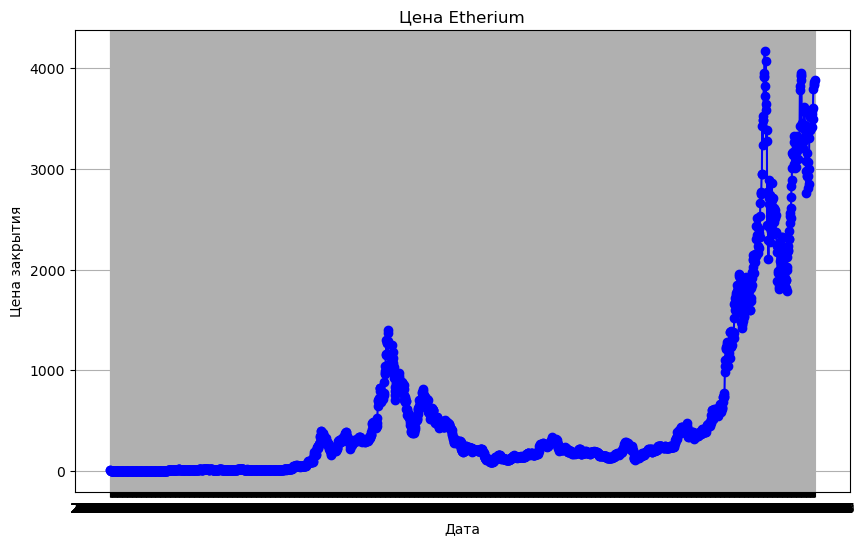

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(ETH_df['Date'], ETH_df['Open'], marker='o', linestyle='-', color='b')
plt.title('Цена Etherium')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid(True)

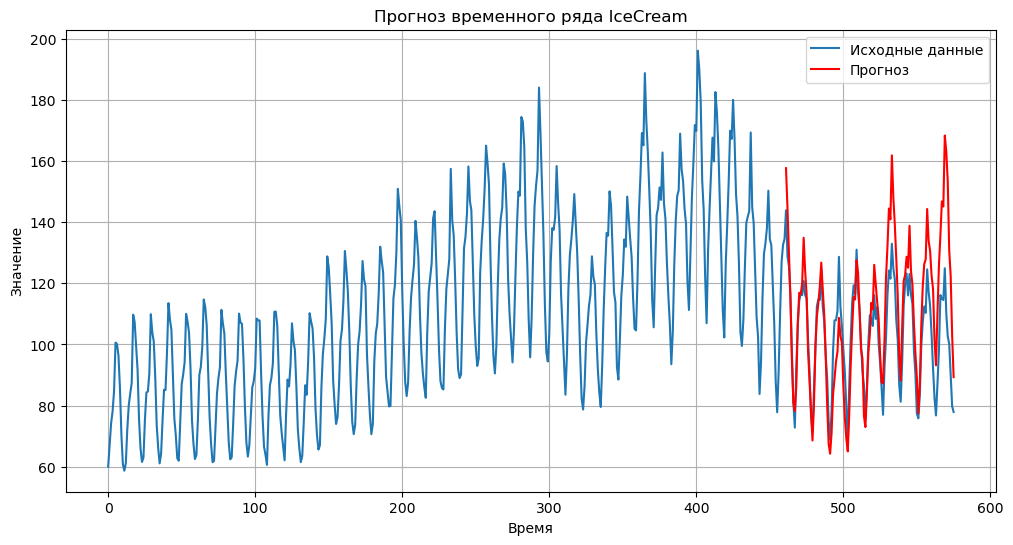

MAPE: 0.10725678097424327
MSE: 224.65108099726822


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def forecast(data: np.array, h: int, m: int) -> np.array:
    z0 = data[-m:]
    z = [data[i : i+m] for i in range(len(data) - (m + h + 1), 0, -1)]
    
    max_idx = len(data) - (m + h + 1) - np.argmax(list(map(lambda x: np.cov(z0, x)[0, 1]/(np.std(x) * np.std(z0)), np.array(z))))
    zk = data[max_idx: max_idx + m].reshape(-1, 1)
    zk = np.hstack([zk, np.ones(m).reshape(-1, 1)])
    
    coef = np.matmul(np.matmul(zk.T, z0.reshape(-1, 1)).T, np.linalg.inv(np.matmul(zk.T, zk)))[0]
    
    return data[max_idx + m : max_idx + m + h] * coef[0] + coef[-1]

data = IceCream_df['value'].values

h = int(len(data) * 0.2) 
m = 10  
data_pred = forecast(data[:-h], h=h, m=m)
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(data)), data, label='Исходные данные')
plt.plot(np.arange(len(data) - h, len(data)), data_pred, label='Прогноз', color='red')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогноз временного ряда IceCream')
plt.legend()
plt.grid(True)
plt.show()

mape = mean_absolute_percentage_error(data[-h:], data_pred)
mse = mean_squared_error(data[-h:], data_pred)
print(f"MAPE: {mape}")
print(f"MSE: {mse}")

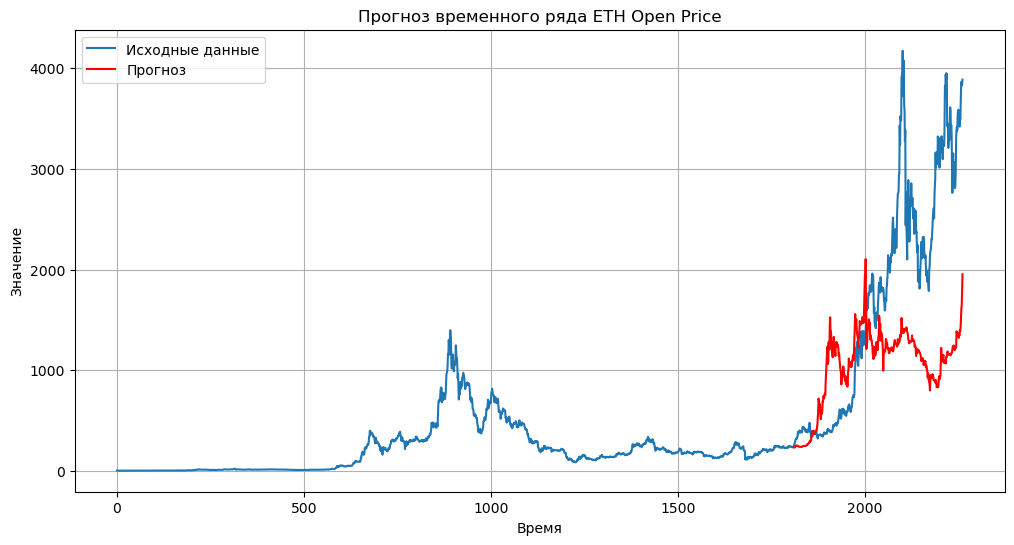

MAPE: 0.5802809408970512
MSE: 1419393.5939311339


In [18]:
data = ETH_df['Open'].values
h = int(len(data) * 0.2) 
m = 10  
data_pred = forecast(data[:-h], h=h, m=m)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(data)), data, label='Исходные данные')
plt.plot(np.arange(len(data) - h, len(data)), data_pred, label='Прогноз', color='red')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогноз временного ряда ETH Open Price')
plt.legend()
plt.grid(True)
plt.show()


mape = mean_absolute_percentage_error(data[-h:], data_pred)
mse = mean_squared_error(data[-h:], data_pred)
print(f"MAPE: {mape}")
print(f"MSE: {mse}")